In [1]:
!pip install selenium

In [2]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
path = r"C:\Users\prasa\Downloads\edgedriver_win64\msedgedriver.exe"

In [4]:
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options

In [5]:
service = Service(executable_path = path)
options = webdriver.EdgeOptions()

In [6]:
driver = webdriver.Edge(service=service, options= options)

In [7]:
driver.get('https://www.booking.com/searchresults.en-gb.html?label=msn-HiTydpHndf_KligNqm9Sgw-79852220055838%3Atikwd-79852393960302%3Aloc-90%3Aneo%3Amte%3Alp157375%3Adec%3Aqsbooking.com&aid=2369661&ss=Hyderabad%2C+India&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2097701&dest_type=city&checkin=2023-11-24&checkout=2023-11-25&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset=75')

In [8]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [9]:
soup

<html class="b_chrome b_chrome_119 supports_inline-block supports_flexbox_unprefixed supports_fontface hasJS" dir="ltr" lang="en-gb" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# booking_com: http://ogp.me/ns/fb/booking_com#"><head><script async="" src="https://www.google.com/recaptcha/api.js?render=6LfzopcUAAAAAPh4ue2iRjzP6XdxDVpwJigtlmeD&amp;onload=onLoadRecaptchaV3Callback&amp;_=1700227466208"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-5Q664QZ"></script><script async="" nonce="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCo

In [10]:
soup.find('span',class_='aee5343fdb def9bc142a').text

'HITEC City, Hyderabad'

In [11]:
Title=[]
location=[]
price=[]
rating=[]
reviewers=[]
TandC=[]
opinion=[]
dfc=[]


for i in range(0,101,25):
    url=f'https://www.booking.com/searchresults.en-gb.html?label=msn-HiTydpHndf_KligNqm9Sgw-79852220055838%3Atikwd-79852393960302%3Aloc-90%3Aneo%3Amte%3Alp157375%3Adec%3Aqsbooking.com&aid=2369661&ss=Hyderabad%2C+India&lang=en-gb&sb=1&src_elem=sb&src=index&dest_id=-2097701&dest_type=city&checkin=2023-11-24&checkout=2023-11-25&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&offset={i}'
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    for i in soup.find_all('div',class_='f6431b446c a15b38c233'):
        k=i.text
        if k:
            Title.append(k)
        else:
            Title.append(np.nan)
    for i in soup.find_all('span',class_='aee5343fdb def9bc142a'):
        k=i.text
        
        regex=re.findall('.*(Hyderabad)',k)
        if len(regex)==1:
            location.append(regex[0])
    
    for i in soup.find_all('span',class_='f6431b446c fbfd7c1165 e84eb96b1f'):
        k=i.text
        regex=re.findall('\d.+',k)
        if regex:
            price.append(regex[0].replace(',',''))
        else:
            price.append(np.nan)
    for i in soup.find_all('div',class_='a3b8729ab1 d86cee9b25'):
        k=i.text
        if k:
            rating.append(k)
        else:
            rating.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32 d935416c47'):
        k=i.text
        regex=re.findall('(.*)reviews',k)
        if regex:
            reviewers.append(regex[0].replace(',',''))
        else:
            reviewers.append(np.nan)
    for i in soup.find_all('div',class_='abf093bdfe f45d8e4c32'):
        k=i.text
        regex=re.findall('(\d.+)\staxes',k)
        if regex:
            TandC.append(regex[0].replace(',',''))
    for i in soup.find_all('div',class_='a3b8729ab1 e6208ee469 cb2cbb3ccb'):
        k=i.text
        if k:
            opinion.append(k)
        else:
            opinion.append(np.nan)
    for i in soup.find_all('span',class_='f419a93f12'):
        k=i.text
        regex=re.findall('(.*)\skm',k)
        if regex:
            dfc.append(regex[0])
  



In [12]:
len(Title)

125

In [13]:
len(location)

125

In [14]:
len(price)

125

In [15]:
len(TandC)

125

In [16]:
len(dfc)

125

In [17]:
len(rating)

119

In [18]:
len(reviewers)

119

In [19]:
len(opinion)

119

In [20]:



tp=[]
for i in range(0,len(Title)):
    k=int(price[i])+int(TandC[i])
    tp.append(k)

In [21]:
opinion

['Fabulous ',
 'Review score ',
 'Exceptional ',
 'Superb ',
 'Very good ',
 'Exceptional ',
 'Very good ',
 'Very good ',
 'Good ',
 'Good ',
 'Fabulous ',
 'Good ',
 'Good ',
 'Very good ',
 'Good ',
 'Fabulous ',
 'Very good ',
 'Good ',
 'Good ',
 'Very good ',
 'Review score ',
 'Very good ',
 'Very good ',
 'Review score ',
 'Review score ',
 'Fabulous ',
 'Fabulous ',
 'Good ',
 'Fabulous ',
 'Good ',
 'Superb ',
 'Good ',
 'Very good ',
 'Good ',
 'Good ',
 'Superb ',
 'Review score ',
 'Very good ',
 'Review score ',
 'Review score ',
 'Good ',
 'Good ',
 'Very good ',
 'Good ',
 'Good ',
 'Good ',
 'Fabulous ',
 'Good ',
 'Good ',
 'Very good ',
 'Review score ',
 'Fabulous ',
 'Good ',
 'Review score ',
 'Good ',
 'Very good ',
 'Good ',
 'Review score ',
 'Good ',
 'Review score ',
 'Very good ',
 'Very good ',
 'Very good ',
 'Good ',
 'Good ',
 'Good ',
 'Review score ',
 'Very good ',
 'Review score ',
 'Good ',
 'Good ',
 'Good ',
 'Good ',
 'Good ',
 'Exceptional ',
 '

In [22]:
hyd={"Title":Title,"City":location,"Price(Rs)":price,'Tax+Charges(Rs)':TandC,'Total Price/night(Rs)':tp,'Rating':rating,'Review':opinion,'No of Reviews':reviewers,'Distance from Centre(km)':dfc}

In [26]:

df = pd.DataFrame.from_dict(hyd, orient='index')
df = df.transpose()
df


,Title,City,Price(Rs),Tax+Charges(Rs),Total Price/night(Rs),Rating,Review,No of Reviews,Distance from Centre(km)
0,Treebo Trend The Rise,Hyderabad,3231,388,3619,8.9,Fabulous,14,6.2
1,Hotel Axis Holiday's - Banjara Hills,Hyderabad,1488,178,1666,5.8,Review score,8,1.7
2,FabHotel Rooms 27,Hyderabad,1463,176,1639,9.9,Exceptional,9,6.5
3,Trident Hyderabad,Hyderabad,8300,1494,9794,9.1,Superb,1425,7.3
4,VOILA AT NEST,Hyderabad,1800,216,2016,8.2,Very good,239,11.4
...,...,...,...,...,...,...,...,...,...
120,Monday Hotels Hitec City,Hyderabad,4800,576,5376,None,None,None,8.8
121,The Ranch,Hyderabad,7000,840,7840,None,None,None,39.9
122,Bloom Hotel - Gachibowli,Hyderabad,4950,594,5544,None,None,None,7.6
123,OYO Flagship Friends Luxury Rooms,Hyderabad,731,122,853,None,None,None,5.9


In [116]:
hydhotel=df.dropna()
hydhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     118 non-null    object
 1   City                      118 non-null    object
 2   Price(Rs)                 118 non-null    object
 3   Tax+Charges(Rs)           118 non-null    object
 4   Total Price/night(Rs)     118 non-null    object
 5   Rating                    118 non-null    object
 6   Review                    118 non-null    object
 7   No of Reviews             118 non-null    object
 8   Distance from Centre(km)  118 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [95]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
hydhotel.loc[hydhotel['Review']=='Review score ']=hydhotel.loc[hydhotel['Review']=='Review score '].replace('Review score ',np.nan)

In [118]:
hydhotel.loc[hydhotel['Review']=='Exceptional 9.8']=hydhotel.loc[hydhotel['Review']=='Exceptional 9.8'].replace('Exceptional 9.8',np.nan)

In [119]:
hydhotel.loc[hydhotel['Review']=='Exceptional 10']=hydhotel.loc[hydhotel['Review']=='Exceptional 10'].replace('Exceptional 10',np.nan)

In [120]:
for i in hydhotel['Rating']:
    if float(i) < 8.0:
        hydhotel['Review']=hydhotel['Review'].fillna('Good ')
    if float(i) > 9.5:
        hydhotel['Review']=hydhotel['Review'].fillna('Exceptional')
    else:
        hydhotel['Review']

  

In [121]:
hydhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     118 non-null    object
 1   City                      118 non-null    object
 2   Price(Rs)                 118 non-null    object
 3   Tax+Charges(Rs)           118 non-null    object
 4   Total Price/night(Rs)     118 non-null    object
 5   Rating                    118 non-null    object
 6   Review                    118 non-null    object
 7   No of Reviews             118 non-null    object
 8   Distance from Centre(km)  118 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


<Axes: ylabel='Review'>

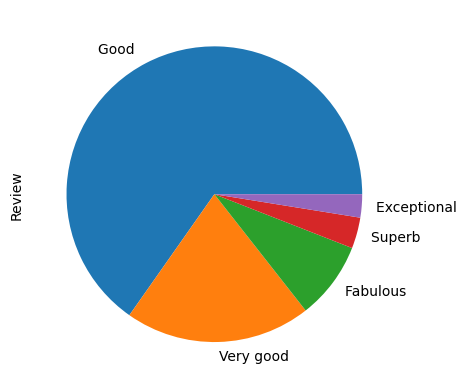

In [122]:
hydhotel['Review'].value_counts().plot(kind='pie')

In [123]:
hydhotel['Review']

0             Good 
1      Exceptional 
2        Very good 
3           Superb 
4        Very good 
           ...     
113      Very good 
114           Good 
115           Good 
116       Fabulous 
117           Good 
Name: Review, Length: 118, dtype: object

In [124]:
hydhotel.to_csv('Hyderabadhotels.csv')


In [1]:
hydhotels

NameError: name 'hydhotels' is not defined

In [125]:
df1=pd.read_csv('Hyderabadhotels.csv')

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                118 non-null    int64  
 1   Title                     118 non-null    object 
 2   City                      118 non-null    object 
 3   Price(Rs)                 118 non-null    int64  
 4   Tax+Charges(Rs)           118 non-null    int64  
 5   Total Price/night(Rs)     118 non-null    int64  
 6   Rating                    118 non-null    float64
 7   Review                    118 non-null    object 
 8   No of Reviews             118 non-null    object 
 9   Distance from Centre(km)  118 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 9.3+ KB


In [127]:
df1

,Unnamed: 0,Title,City,Price(Rs),Tax+Charges(Rs),Total Price/night(Rs),Rating,Review,No of Reviews,Distance from Centre(km)
0,0,Great Spacious Villa with Courtyard Gardens,Hyderabad,10800,1944,12744,7.1,Good,127,3.7
1,1,3BHK Budget Apartment in Hyderabad Near Charminar,Hyderabad,4800,576,5376,9.9,Exceptional,9,7.3
2,2,KPHB Phase 15 New Stunning 15 BHKs Full Buildi...,Hyderabad,4898,588,5486,8.2,Very good,238,7.2
3,3,Hotel Lake View Airport zone,Hyderabad,1596,192,1788,9.0,Superb,32,18.3
4,4,Hyderabad Budget Apartment - 2BHK & 1BHK,Hyderabad,3999,480,4479,8.0,Very good,17,4.5
...,...,...,...,...,...,...,...,...,...,...
113,113,Collection O 81309 Hamsa the Right choice,Hyderabad,1454,209,1663,6.8,Very good,323,6.8
114,114,Capital O Halcyon Inr Suites Madhapur,Hyderabad,2643,334,2977,7.1,Good,95,6.4
115,115,Townhouse 1065 Hotel S Continental Near Birla ...,Hyderabad,991,144,1135,8.8,Good,78,6.2
116,116,"Holiday Inn Express Hyderabad Banjara Hills, a...",Hyderabad,7019,842,7861,7.5,Fabulous,51,1.7
